In [1]:
import pandas as pd
 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
from sklearn.model_selection import train_test_split
 
from sklearn.metrics import classification_report
 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv("/content/drive/MyDrive/NLP/whatsapp task - Copy of whatsapp - whatsapp - Sheet1.csv")

In [4]:
df.shape

(244, 2)

In [5]:
df.head()

,Messages,Command
0,Hello,English
1,Good morning/ afternoon/ evening - According t...,English
2,How are you,English
3,How are you doing,English
4,How do you do,English


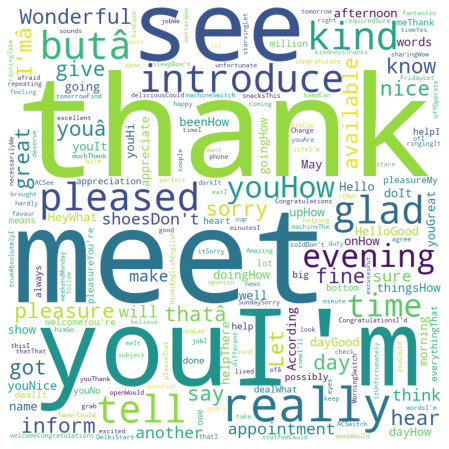

In [6]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)
 
wc.generate(''.join(df[df["Command"]=="English"]["Messages"]))
 
plt.figure(figsize = (8,8)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

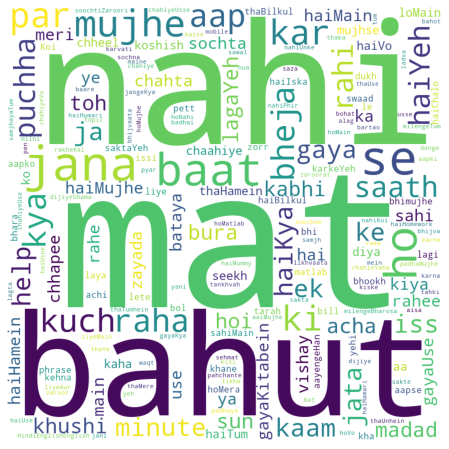

In [7]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)
 
wc.generate(''.join(df[df["Command"]=="Hindi"]["Messages"]))
 
plt.figure(figsize = (8,8)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [8]:
X = df["Messages"]
y = df["Command"]

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
y = le.fit_transform(y)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Vectorization.

In [13]:
# CountVectorizer
cv = CountVectorizer(stop_words="english")

In [14]:
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

<b>Decision Tree.</b>

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_cv, y_train)
y_pred = dt.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.81      0.89        31

    accuracy                           0.92        74
   macro avg       0.94      0.90      0.91        74
weighted avg       0.93      0.92      0.92        74



In [16]:
# Tfidf vectorization
tfidf = TfidfVectorizer(stop_words="english")

In [17]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf, y_train)
y_pred = dt.predict(X_test_tfidf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        43
           1       1.00      0.77      0.87        31

    accuracy                           0.91        74
   macro avg       0.93      0.89      0.90        74
weighted avg       0.92      0.91      0.90        74



<b>Logistic Regression.</b>

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)
y_pred = lr.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.81      0.89        31

    accuracy                           0.92        74
   macro avg       0.94      0.90      0.91        74
weighted avg       0.93      0.92      0.92        74



In [20]:
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       1.00      0.87      0.93        31

    accuracy                           0.95        74
   macro avg       0.96      0.94      0.94        74
weighted avg       0.95      0.95      0.95        74



<b>Random Forest Classifier.</b>

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_cv,y_train)
y_pred = lr.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       1.00      0.87      0.93        31

    accuracy                           0.95        74
   macro avg       0.96      0.94      0.94        74
weighted avg       0.95      0.95      0.95        74



In [22]:
rf.fit(X_train_tfidf,y_train)
y_pred = lr.predict(X_test_tfidf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       1.00      0.87      0.93        31

    accuracy                           0.95        74
   macro avg       0.96      0.94      0.94        74
weighted avg       0.95      0.95      0.95        74



<b>XGB Classifier.</b>

In [23]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train_cv,y_train)
y_pred = lr.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       1.00      0.87      0.93        31

    accuracy                           0.95        74
   macro avg       0.96      0.94      0.94        74
weighted avg       0.95      0.95      0.95        74



In [24]:
xg.fit(X_train_tfidf,y_train)
y_pred = lr.predict(X_test_tfidf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       1.00      0.87      0.93        31

    accuracy                           0.95        74
   macro avg       0.96      0.94      0.94        74
weighted avg       0.95      0.95      0.95        74



In [25]:
## dt.predict([cv.transform("kaise ho")])[0]

In [26]:
new_sentence = cv.transform(["kaise ho"])[0]

In [27]:
new_sentence

<1x322 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [28]:
print(dt.predict(new_sentence))

[0]


In [29]:
new_sentence2 = cv.transform(["bahut"])[0]
print(dt.predict(new_sentence2))

[1]
